In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Required libraries
# For data wrangling
import pandas as pd
import numpy as np

# Read the DataFrame
bank = pd.read_csv('/content/Churn_Modelling.csv')

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split

# Standardize data value
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Imbalance data
from imblearn.over_sampling import SMOTE

# Remove warning messages
import warnings
warnings.filterwarnings("ignore")

# Scoring functions
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score



In [3]:
#Review the top rows of what os left of the dataframe
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#check data types of columns
dataTypeSeries = bank.dtypes
dataTypeSeries


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#How much data is contained in this dataset?
datasetSize = bank.shape
datasetSize
#In this dataset it contain 10000 rows and 14 columns

(10000, 14)

In [7]:
#Checking the dataset have missing values or not
nullValue = bank.isnull().any()
nullValue

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

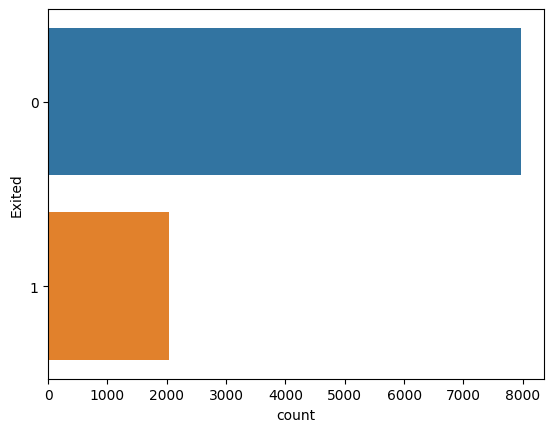

In [8]:
#display the chart
sns.countplot(y="Exited", data=bank)
plt.show()

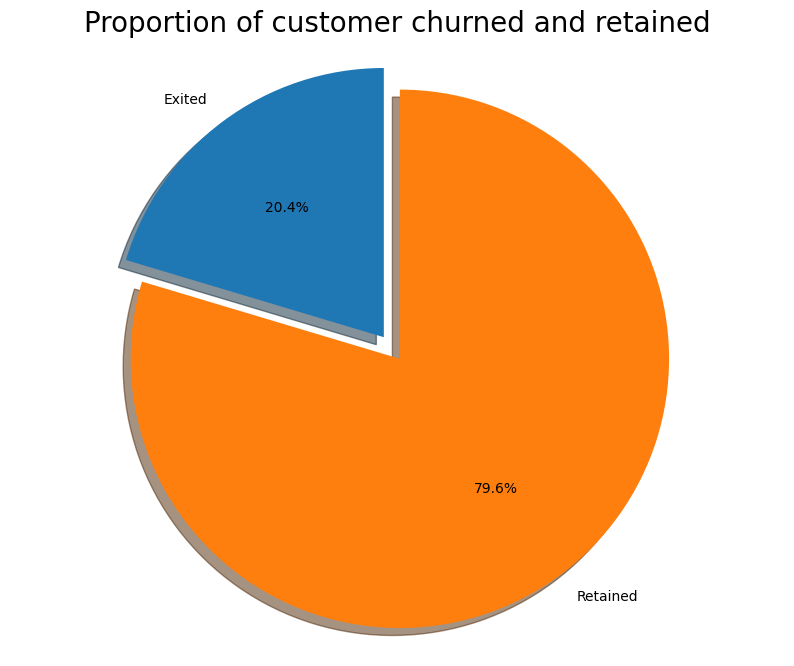

In [9]:
#No of exited vs Active  get the percentage split figure
labels = 'Exited', 'Retained'
sizes = [bank.Exited[bank['Exited']==1].count(), bank.Exited[bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

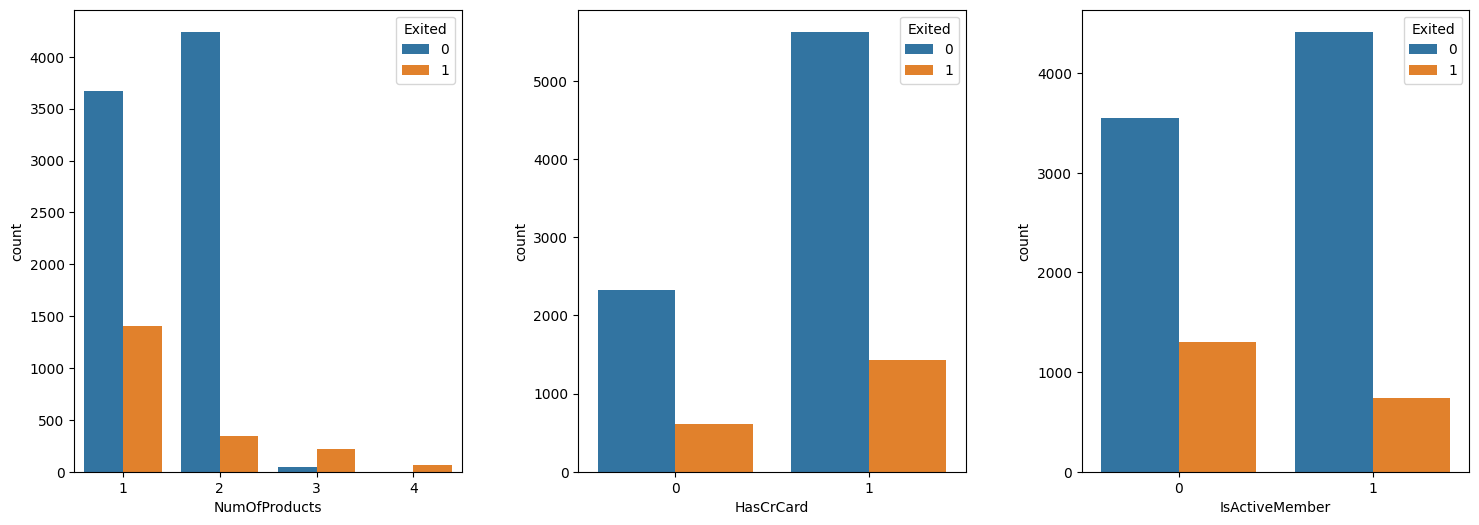

In [10]:
# We first review the 'Status' relation with categorical variables
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = bank, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = bank, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = bank, ax = ax[2])


<Axes: >

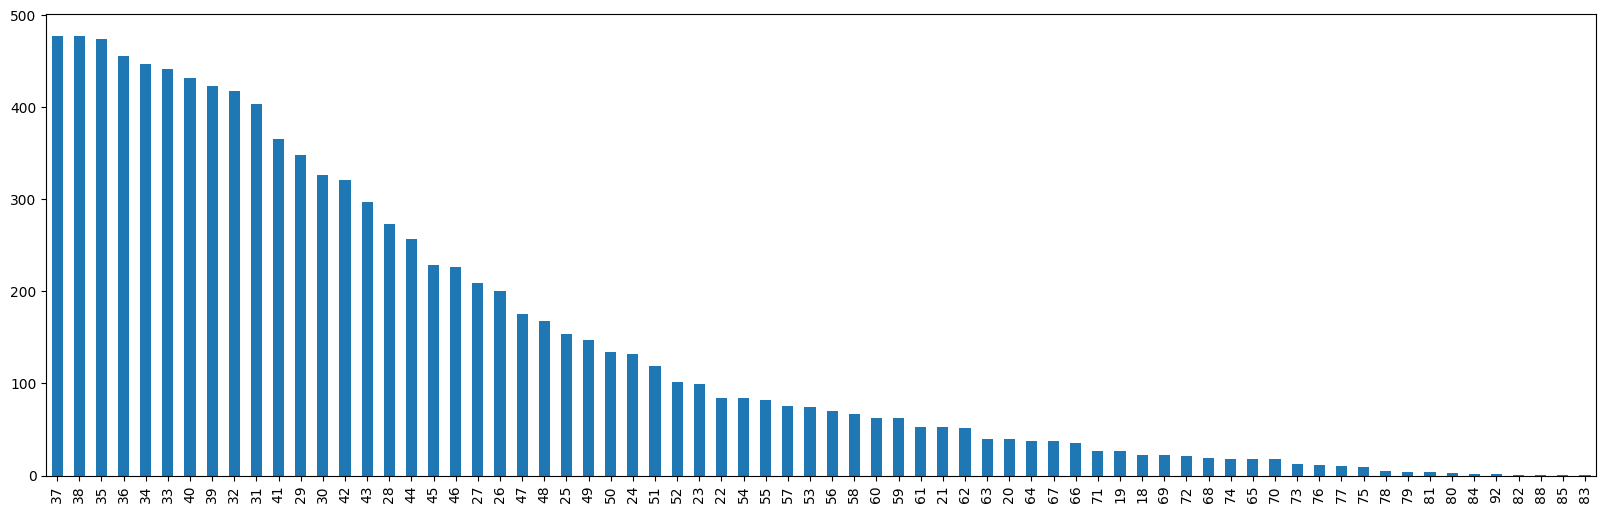

In [11]:
bank["Age"].value_counts().plot.bar(figsize=(20,6))


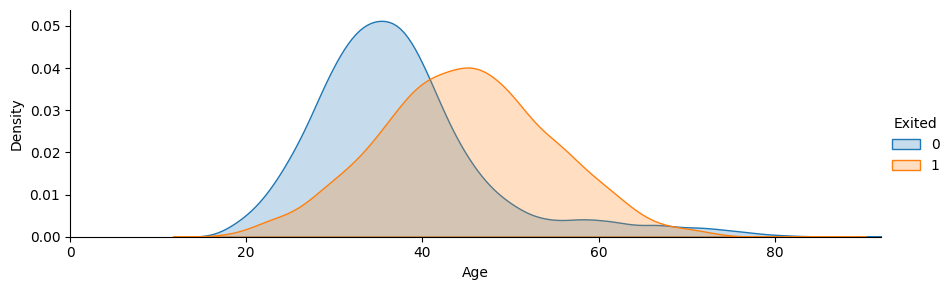

In [12]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, bank["Age"].max()))
facet.add_legend()

plt.show()


<Axes: xlabel='Age', ylabel='CreditScore'>

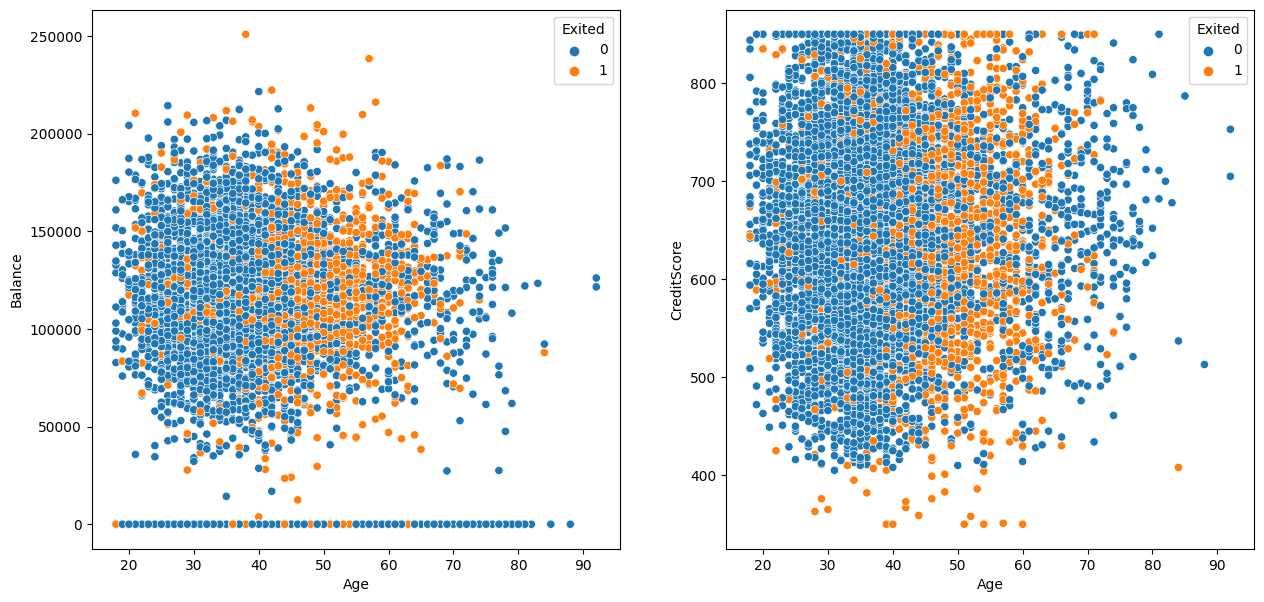

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = bank, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = bank, ax=ax[1])

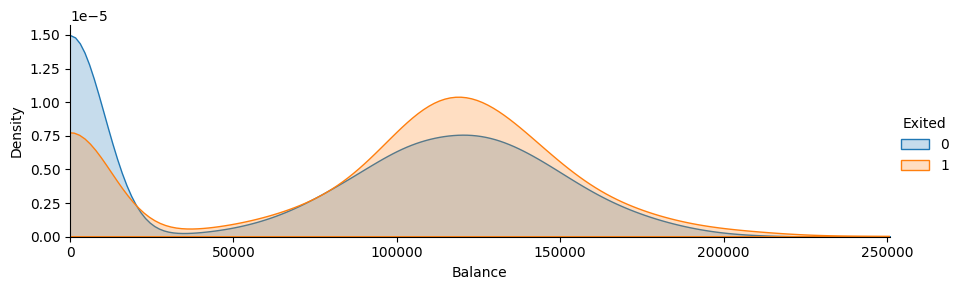

In [14]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, bank["Balance"].max()))
facet.add_legend()

plt.show()

<Axes: xlabel='Balance', ylabel='CreditScore'>

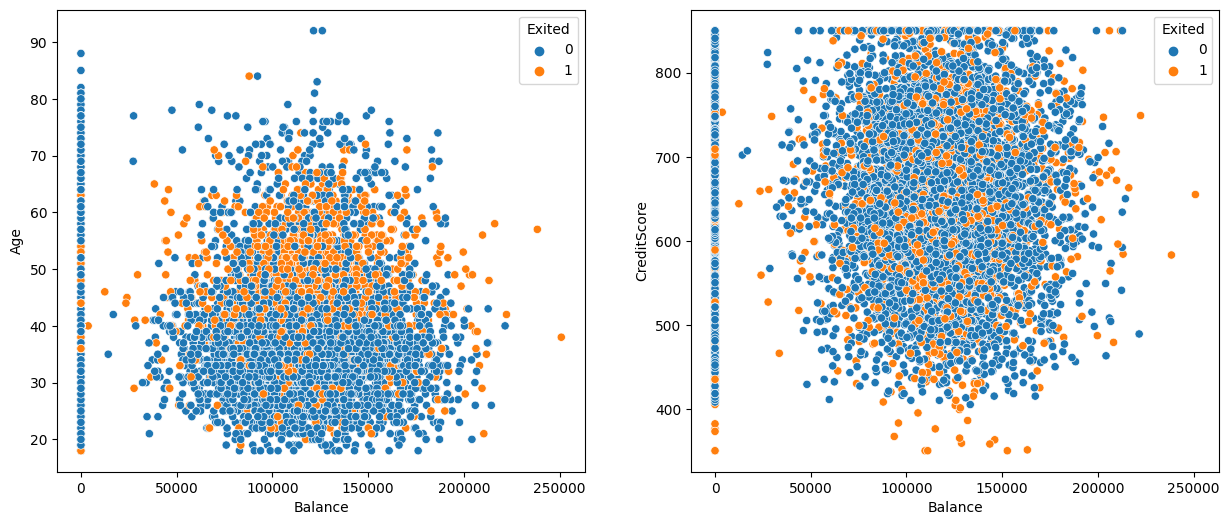

In [15]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = bank, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = bank, hue="Exited", ax = ax[1])

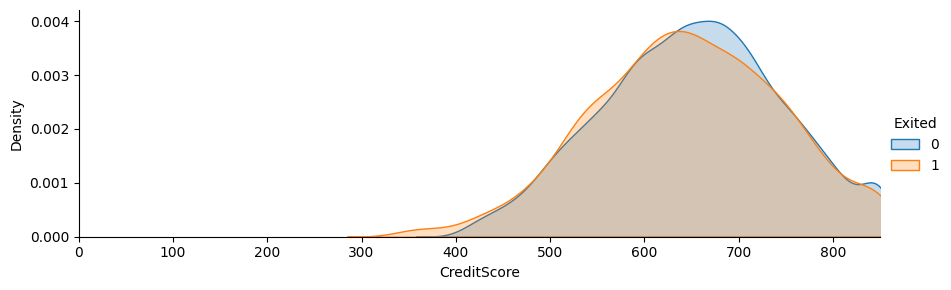

In [16]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, bank["CreditScore"].max()))
facet.add_legend()

plt.show()

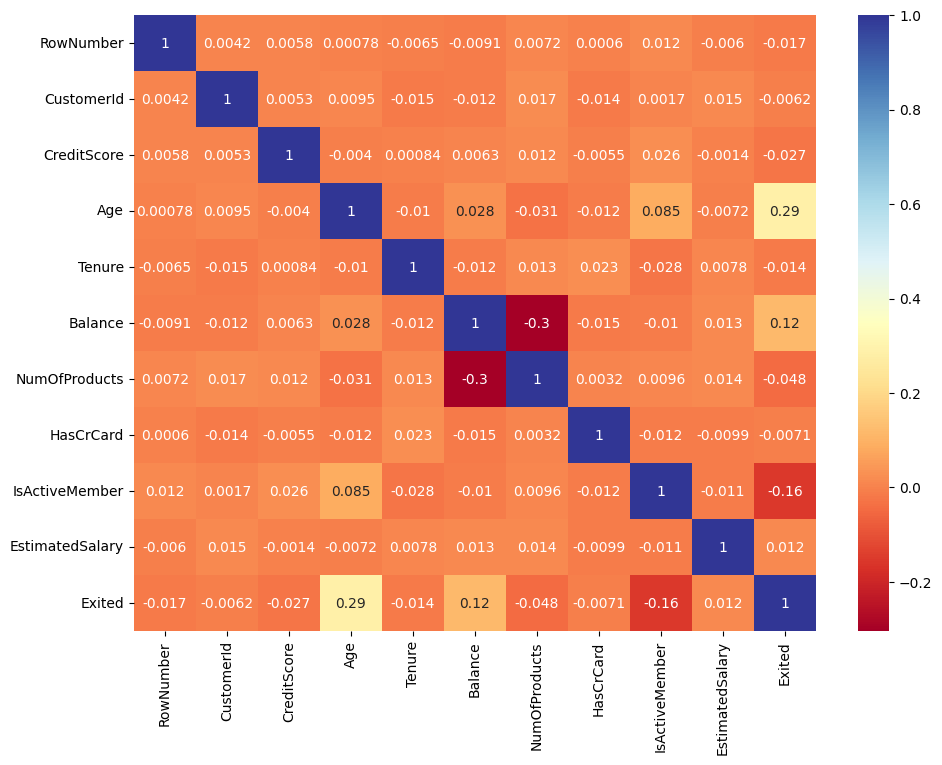

In [17]:


plt.subplots(figsize=(11,8))
sns.heatmap(bank.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [18]:
bank = bank.drop(['RowNumber','Surname','CustomerId'], axis=1)

bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
encoder = LabelEncoder()
bank["Geography"] = encoder.fit_transform(bank["Geography"])
bank["Gender"] = encoder.fit_transform(bank["Gender"])

bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#check missing value
nullValue = bank.isnull().any()
nullValue

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [21]:
# Drops missing values for all columns
bank = bank.dropna(how='any')


<Axes: >

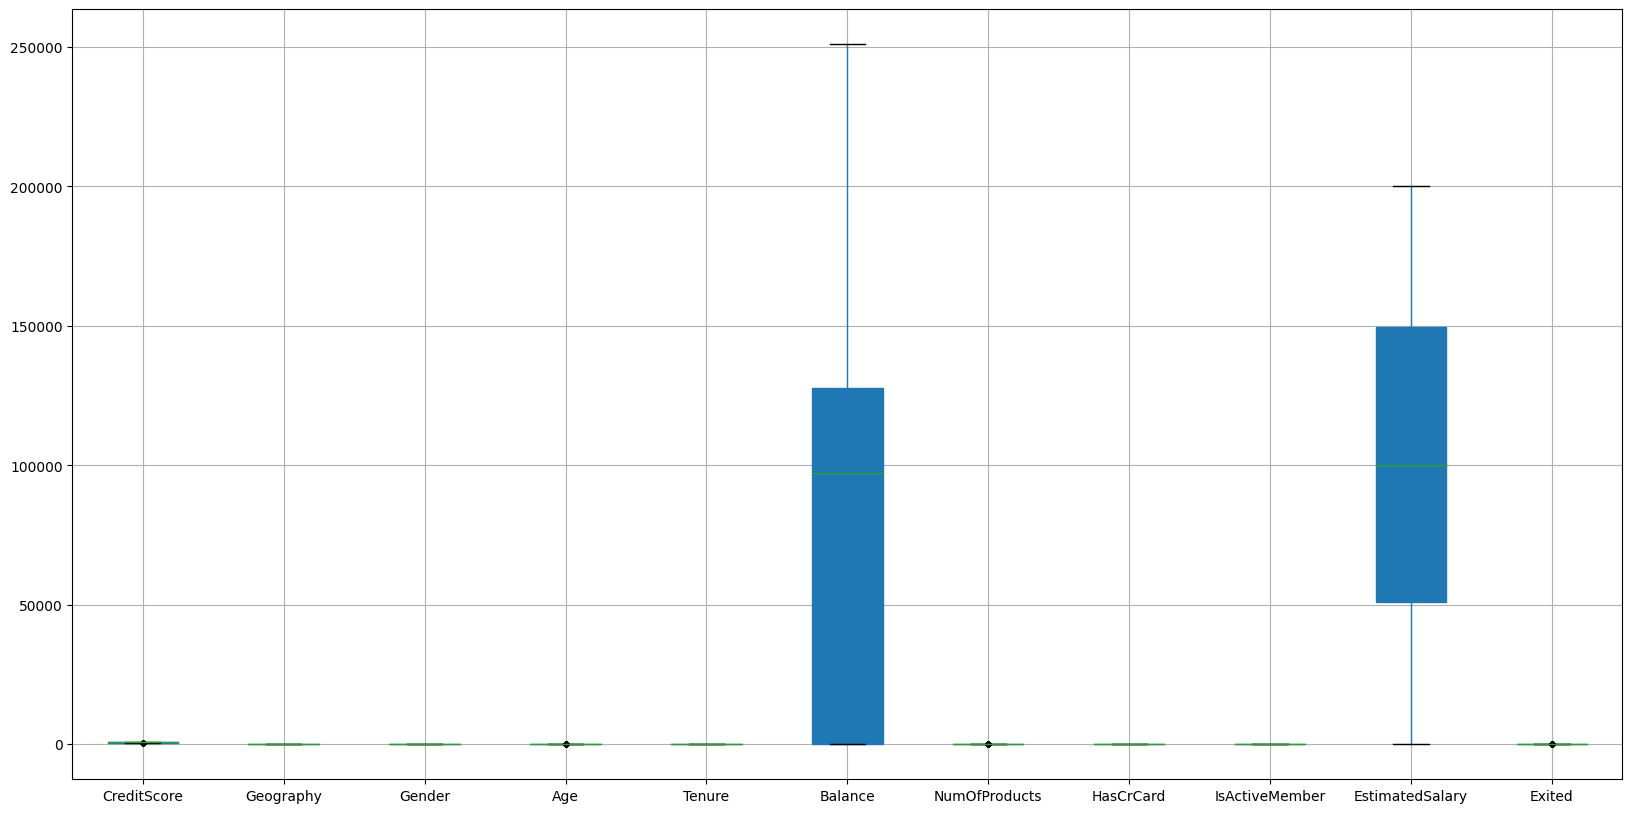

In [22]:
plt.subplots(figsize = (20,10))
bank.boxplot(patch_artist= True, sym="k.")


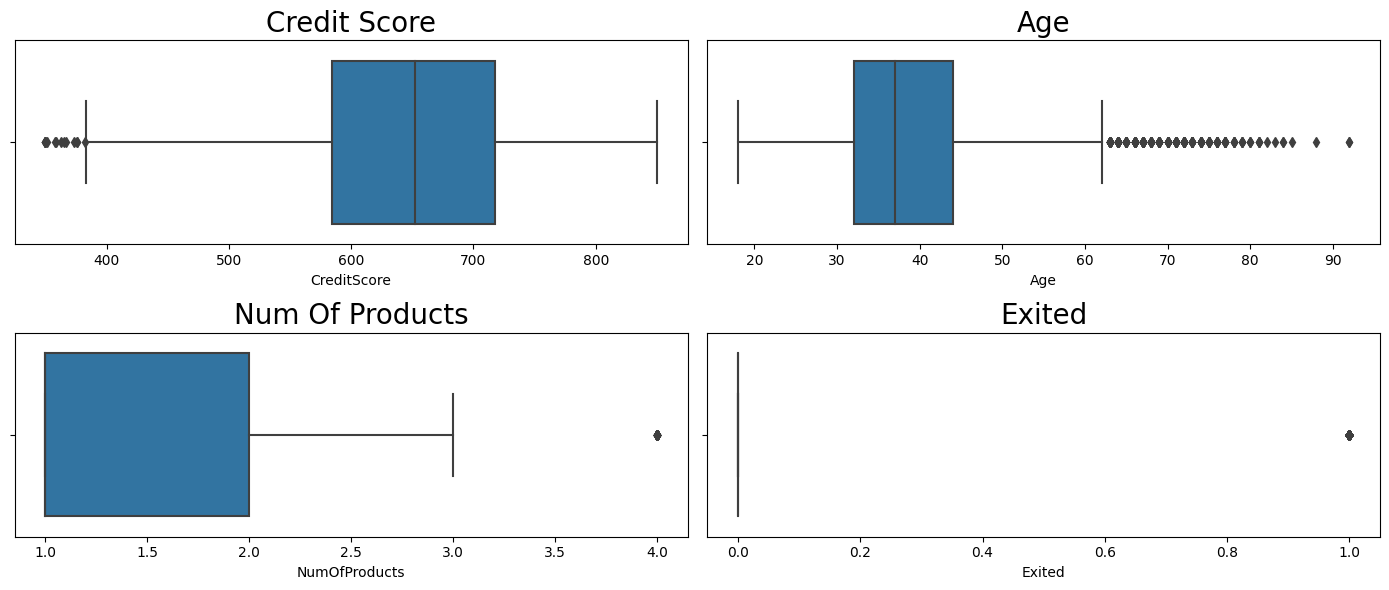

In [23]:
#format the figure size to 20rows,10cols
plt.subplots(figsize = (14,6))

#plot graph by Credit Score
plt.subplot(221)
sns.boxplot(x = bank["CreditScore"])
plt.title("Credit Score", fontsize = 20)

#plot graph by Age
plt.subplot(222)
sns.boxplot(x = bank["Age"])
plt.title("Age", fontsize = 20)

#plot graph by NumOfProducts
plt.subplot(223)
sns.boxplot(x = bank["NumOfProducts"])
plt.title("Num Of Products", fontsize = 20)

#plot graph by Exited
plt.subplot(224)
sns.boxplot(x = bank["Exited"])
plt.title("Exited", fontsize = 20)

plt.tight_layout()
plt.show()

In [24]:
#count the rows with "Y" and "N" in the Exited
bank['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
#highly unbalanced dataset,
#lets describe data
bank.describe()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
C = bank.drop("Exited", axis=1)

In [27]:
X = np.array(bank.iloc[:, bank.columns != 'Exited'])
y = np.array(bank.iloc[:, bank.columns == 'Exited'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

X_train:  (8000, 10)
y_train:  (8000, 1)


In [28]:
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_test:  (2000, 10)
y_test:  (2000, 1)


In [29]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of X: (10000, 10)
Shape of y: (10000, 1)
Number transactions X_train dataset:  (8000, 10)
Number transactions y_train dataset:  (8000, 1)
Number transactions X_test dataset:  (2000, 10)
Number transactions y_test dataset:  (2000, 1)


In [30]:

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# Confirm the data has been balanced
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': [1632]
Before OverSampling, counts of label '0': [6368] 

After OverSampling, the shape of train_X: (12736, 10)
After OverSampling, the shape of train_y: (12736,) 

After OverSampling, counts of label '1': 6368
After OverSampling, counts of label '0': 6368


['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']


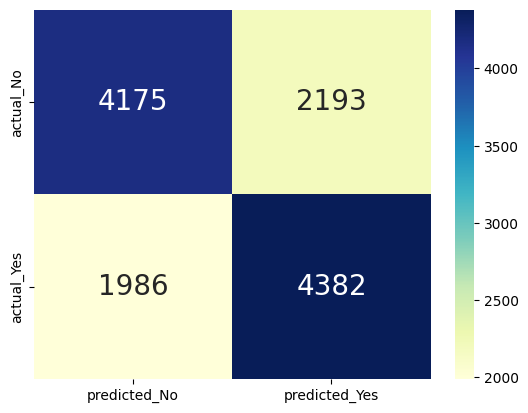

In [31]:
## Logistic Regression

#import the library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

lr = LogisticRegression()

#Train the mdoel
lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_lr_train]))

#display confusion matrix for trainset
lr_cm_train = confusion_matrix(y_train,pred_lr_train)
sns.heatmap(lr_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm_train[0]
true_pos, false_neg = lr_cm_train[1]


['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
            Trainset             Testset
Accuracy:   0.671875 		 0.6685
Recall:     0.6881281407035176 	 0.7209876543209877
Precision:  0.6664638783269962 	 0.34679334916864607
F1 score:   0.6771227690643591 	 0.46832397754611066


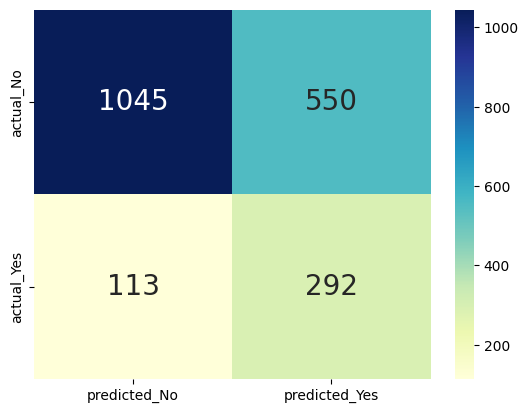

In [32]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_lr = lr.predict(X_test)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_lr]))

#display confusion matrix for testset
lr_cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(lr_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm[0]
true_pos, false_neg = lr_cm[1]

#print the accuracy score, recall, precision and F1 score
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_lr_train),"\t\t",accuracy_score(y_test,pred_lr))
print("Recall:    ",recall_score(y_train,pred_lr_train),"\t",recall_score(y_test,pred_lr))
print("Precision: ",precision_score(y_train,pred_lr_train),"\t",precision_score(y_test,pred_lr))
print("F1 score:  ",f1_score(y_train,pred_lr_train),"\t",f1_score(y_test,pred_lr))


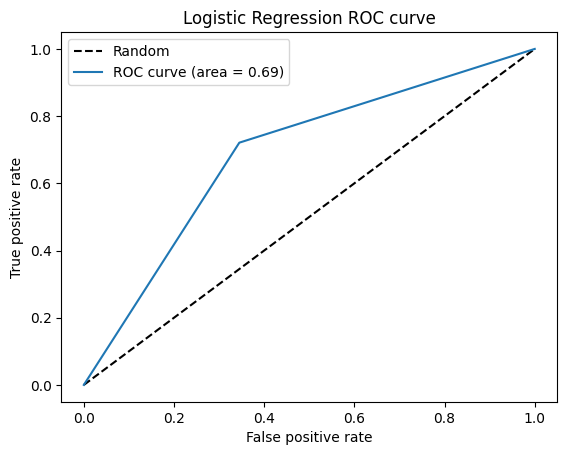

In [33]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_lr)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc ='best')

In [34]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100)

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier()

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


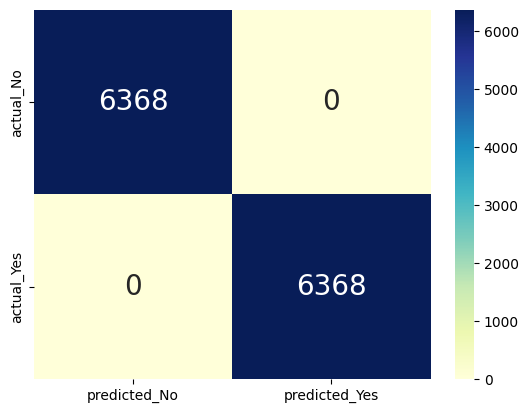

In [35]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf_train = rf.predict(X_train)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_rf_train]))

#display confusion matrix for trainset
rf_cm_train = confusion_matrix(y_train,pred_rf_train)
sns.heatmap(rf_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm_train[0]
true_pos, false_neg = rf_cm_train[1]

['No' 'No' 'No' ... 'No' 'No' 'No']
            Trainset     Testset
Accuracy:   1.0 	 0.864
Recall:     1.0 	 0.5481481481481482
Precision:  1.0 	 0.7138263665594855
F1 score:   1.0 	 0.6201117318435754


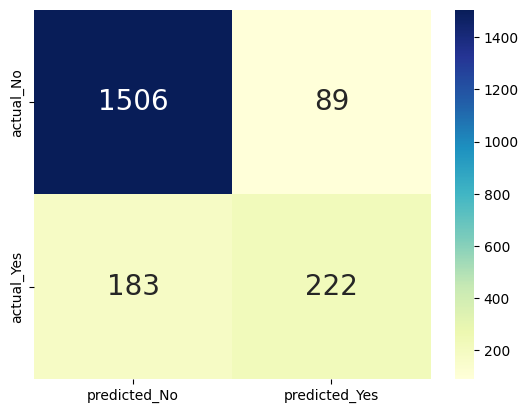

In [36]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf = rf.predict(X_test)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_rf]))

#display confusion matrix
rf_cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(rf_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm[0]
true_pos, false_neg = rf_cm[1]

#print the accuracy score, recall, precision and F1 score
print("            Trainset     Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_rf_train),"\t",accuracy_score(y_test,pred_rf))
print("Recall:    ",recall_score(y_train,pred_rf_train),"\t",recall_score(y_test,pred_rf))
print("Precision: ",precision_score(y_train,pred_rf_train),"\t",precision_score(y_test,pred_rf))
print("F1 score:  ",f1_score(y_train,pred_rf_train),"\t",f1_score(y_test,pred_rf))

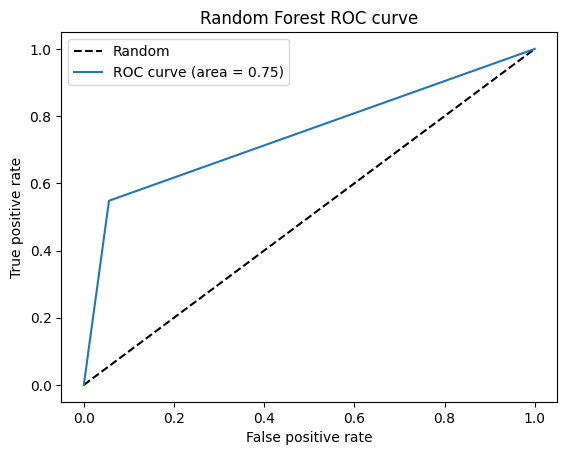

In [37]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc ='best')

<Axes: >

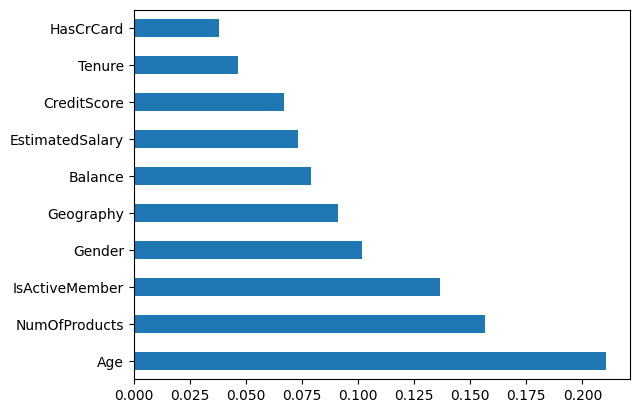

In [38]:
rf_feat_importances = pd.Series(rf.feature_importances_, index=C.columns)
rf_feat_importances.nlargest(10).plot(kind='barh')

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


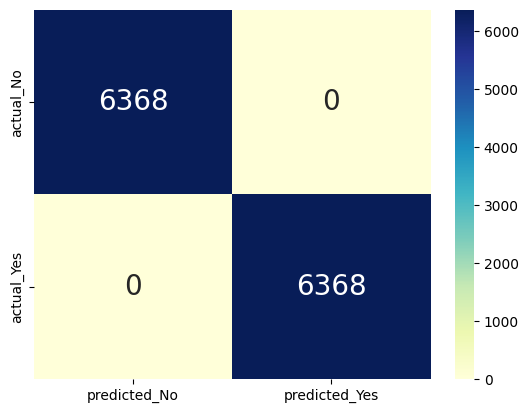

In [39]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#train using the algorithm
dt.fit(X_train,y_train)
pred_dt_train = dt.predict(X_train)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_dt_train]))

#display confusion matrix for trainset
dt_cm_train = confusion_matrix(y_train,pred_dt_train)
sns.heatmap(dt_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm_train[0]
true_pos, false_neg = dt_cm_train[1]

['Yes' 'No' 'No' ... 'No' 'No' 'No']
            Trainset             Testset
Accuracy:   1.0 	 0.798
Recall:     1.0 	 0.5753086419753086
Precision:  1.0 	 0.5010752688172043
F1 score:   1.0 	 0.535632183908046


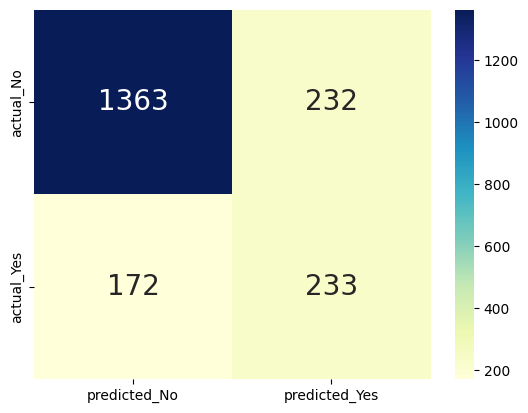

In [40]:
#use trainset to do prediction on testset
pred_dt = dt.predict(X_test)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_dt]))

#display confusion matrix for testset
dt_cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(dt_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm[0]
true_pos, false_neg = dt_cm[1]

#print the accuracy score, recall, precision and F1 score
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_dt_train),"\t",accuracy_score(y_test,pred_dt))
print("Recall:    ",recall_score(y_train,pred_dt_train),"\t",recall_score(y_test,pred_dt))
print("Precision: ",precision_score(y_train,pred_dt_train),"\t",precision_score(y_test,pred_dt))
print("F1 score:  ",f1_score(y_train,pred_dt_train),"\t",f1_score(y_test,pred_dt))


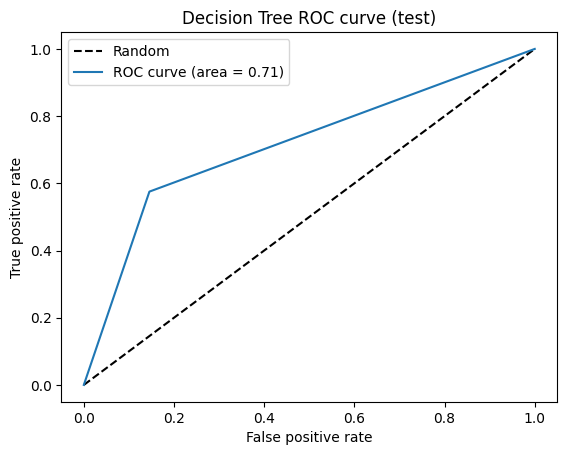

In [41]:
   from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_dt)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve (test)')
plt.legend(loc ='best')


[0.06384713 0.05454599 0.03256429 0.26128018 0.02565842 0.07894265
 0.24081078 0.00793158 0.14830211 0.08611687]


<Axes: >

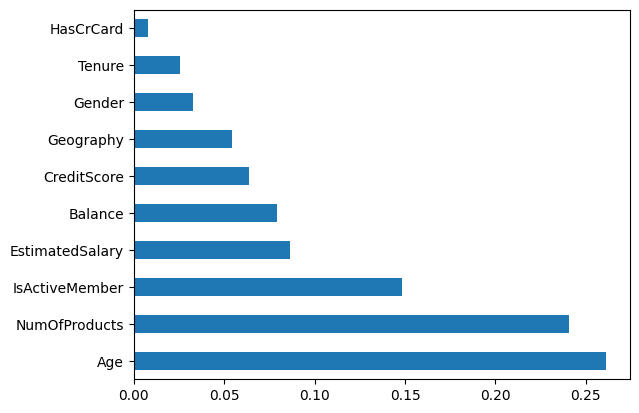

In [42]:
# feature importance
print(dt.feature_importances_)
# plot
dt_feat_importances = pd.Series(dt.feature_importances_, index=C.columns)
dt_feat_importances.nlargest(10).plot(kind='barh')

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


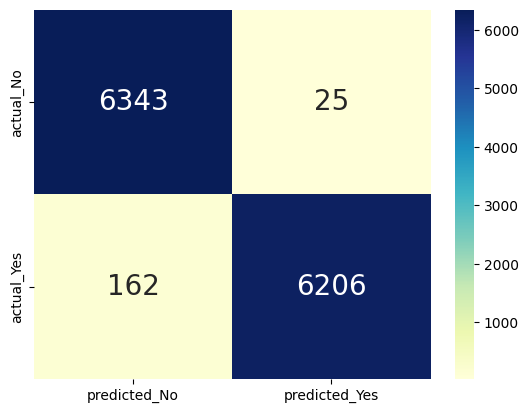

In [43]:
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix

xgb = XGBClassifier(max_depth = 7,random_state=0, n_estimators=100, eval_metric = 'auc', min_child_weight = 1,
                    colsample_bylevel = 1, subsample= 1)
xgb.fit(X_train, y_train)

#Take the model that was trained on the X_train data and apply it to the X_test
pred_xgb = xgb.predict(X_test)
pred_xgb_train = xgb.predict(X_train)

options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_xgb_train]))

#display confusion matrix
xgb_cm = confusion_matrix(y_train,pred_xgb_train)
sns.heatmap(xgb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = xgb_cm[0]
true_pos, false_neg = xgb_cm[1]

['No' 'No' 'No' ... 'No' 'No' 'No']
            Trainset             Testset
Accuracy:   0.9853172110552764 	 0.853
Recall:     0.9745603015075377 	 0.5432098765432098
Precision:  0.9959878029208795 	 0.668693009118541
F1 score:   0.9851575521866814 	 0.5994550408719346


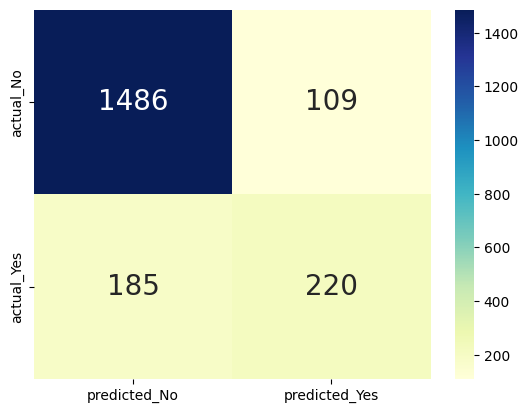

In [44]:
options = {0: "No", 1: "Yes"}
print(np.array([options[x] for x in pred_xgb]))

#display confusion matrix
xgb_cm = confusion_matrix(y_test,pred_xgb)
sns.heatmap(xgb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = xgb_cm[0]
true_pos, false_neg = xgb_cm[1]

#accuracy_xgb_test = accuracy_score(y_test,pred_xgb)
#recall_xgb_test = recall_score(y_test,pred_xgb)
#precision_xgb_test = precision_score(y_test,pred_xgb)
#f1score_xgb_test = f1_score(y_test,pred_xgb)

#print the accuracy score, recall, precision and F1 score
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_xgb_train),"\t",accuracy_score(y_test,pred_xgb))
print("Recall:    ",recall_score(y_train,pred_xgb_train),"\t",recall_score(y_test,pred_xgb))
print("Precision: ",precision_score(y_train,pred_xgb_train),"\t",precision_score(y_test,pred_xgb))
print("F1 score:  ",f1_score(y_train,pred_xgb_train),"\t",f1_score(y_test,pred_xgb))

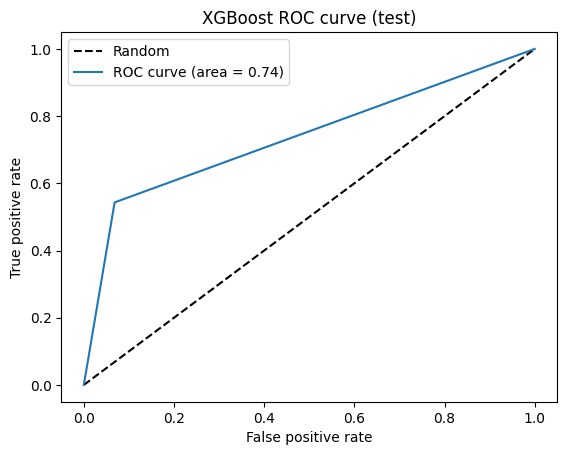

In [45]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_xgb)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve (test)')
plt.legend(loc ='best')


[0.01472808 0.07411607 0.20623356 0.09362973 0.01525241 0.02360572
 0.24254644 0.05383074 0.26054236 0.01551491]


<Axes: >

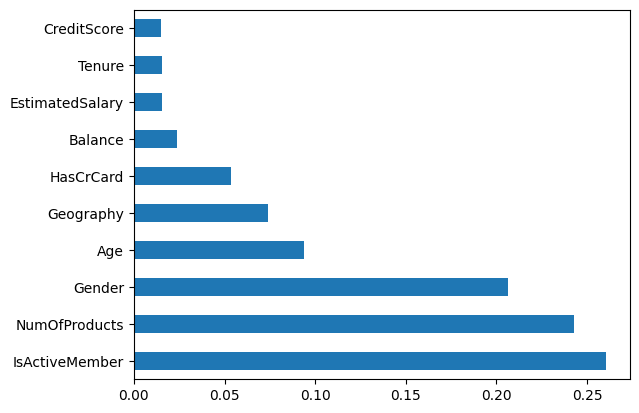

In [46]:
# feature importance
print(xgb.feature_importances_)
# plot
xgb_feat_importances = pd.Series(xgb.feature_importances_, index=C.columns)
xgb_feat_importances.nlargest(10).plot(kind='barh')

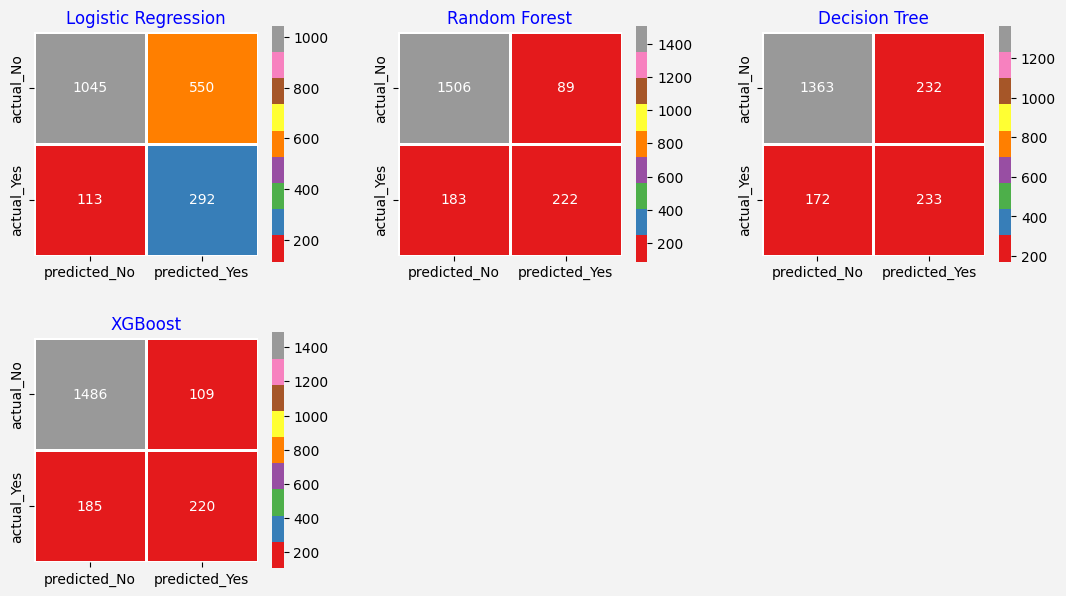

In [47]:
import itertools

evaluation_lst = [lr, rf, dt, xgb]
evaluation_label = [ 'Logistic Regression', 'Random Forest',  'Decision Tree', 'XGBoost', ]

eva_fig = plt.figure(figsize=(13, 15))
eva_fig.set_facecolor("#F3F3F3")

for i, k in zip(evaluation_lst, evaluation_label):
    plt.subplot(4, 3, evaluation_lst.index(i) + 1)
    eva_predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(y_test, eva_predictions)
    sns.heatmap(conf_matrix, annot=True, fmt="d", square=True,
                xticklabels=['predicted_No', 'predicted_Yes'],
                yticklabels=['actual_No', 'actual_Yes'],
                linewidths=2, linecolor="w", cmap="Set1")
    plt.title(k, color="b")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


In [48]:
#gives model report in dataframe
def model_report(testing_y,pred,name) :
    accuracy     = accuracy_score(testing_y,pred)
    recallscore  = recall_score(testing_y,pred)
    precision    = precision_score(testing_y,pred)
    f1score      = f1_score(testing_y,pred)

    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                      })
    return df

#outputs for every model
model_lr = model_report(y_test,pred_lr,"Logistic Regression")
model_rf = model_report(y_test,pred_rf,"Random Forest")
model_dt = model_report(y_test,pred_dt,"Decision Tree")
model_xgb = model_report(y_test,pred_xgb,"XGBoost Classifier")


model_performances = pd.concat([model_lr,model_rf,model_dt,model_xgb,],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Logistic Regression,0.6685,0.720988,0.346793,0.468324
1,Random Forest,0.8640,0.548148,0.713826,0.620112
2,Decision Tree,0.7980,0.575309,0.501075,0.535632
3,XGBoost Classifier,0.8530,0.543210,0.668693,0.599455


In [49]:
#Grid Search for the best model which is XGBoost classifier
from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(C=5,probability = True)
grid_values = parameters = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1],
          'min_samples_split':[2,5,10,100],
          'max_depth':[2,3,5,50]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8525
Precision Score : 0.671875
Recall Score : 0.5308641975308642
F1 Score : 0.593103448275862


array([[1490,  105],
       [ 190,  215]])

In [50]:
from sklearn import model_selection

#X = bank.drop("Exited", axis=1)
#y = bank['Exited']

modelChosen = XGBClassifier()
kfold = model_selection.KFold(n_splits=5,random_state=1,shuffle = True)
result = model_selection.cross_val_score(modelChosen, X, y, cv=kfold)

print("Accuracy : %.3f%% " % (result.mean()*100.0))
print("Standard Deviation : %.3f%% " % (result.std()*100.0))


Accuracy : 85.360% 
Standard Deviation : 0.643% 
